<a href="https://colab.research.google.com/github/joshIsac/ADA/blob/main/image_segementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import os

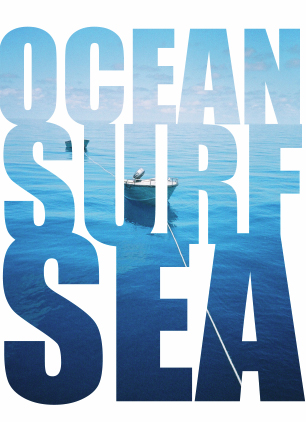

In [11]:
img=cv2.imread('/content/drive/MyDrive/textimage.jpg')
img=cv2_imshow(img)

In [12]:
img = cv2.imread('/content/drive/MyDrive/textimage.jpg', cv2.IMREAD_GRAYSCALE)

In [13]:
#Set tresh-hold for the above
ret,thresh1=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2=cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3=cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4=cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5=cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)



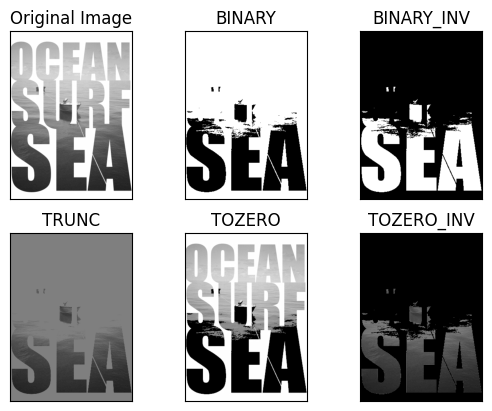

In [14]:
#plotting the image after setting the threshold using matplotlib
titles=['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images=[img,thresh1,thresh2,thresh3,thresh4,thresh5]

#convert the datatype to float
for i in range(6):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.show()

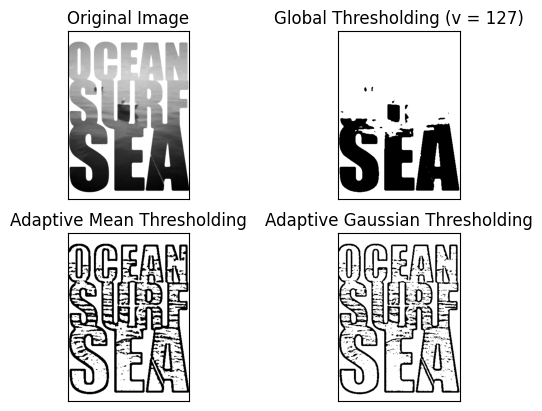

In [15]:
img = cv2.imread('/content/drive/MyDrive/textimage.jpg',cv2.IMREAD_GRAYSCALE)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

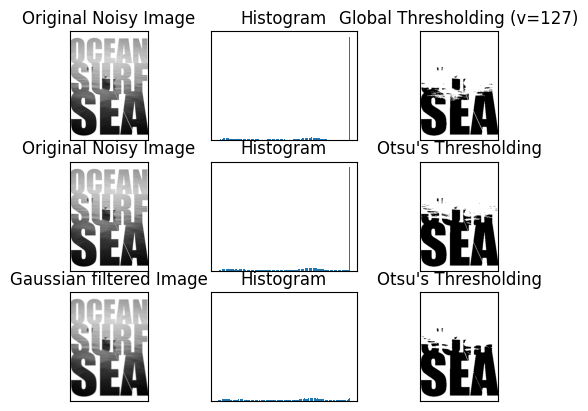

In [16]:
#global thresholding
img = cv2.imread('/content/drive/MyDrive/textimage.jpg',0)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
#otsu treshholding
img = cv2.imread('/content/drive/MyDrive/textimage.jpg',0)
ret,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#otsu after gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#plot the images
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()



In [24]:
import cv2 as cv

# Image segmentation using watershed
img_path = '/content/drive/MyDrive/balls.jpg'  # Make sure this path is correct
img = cv.imread(img_path)

if img is None:
    print(f"Error: Could not read image from {img_path}. Check the file path and permissions.")
else:
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    ret, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
    # Continue with your processing here...

In [25]:
#removing noise
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

#sure background
sure_bg = cv2.dilate(opening, kernel, iterations=3)
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

In [26]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [27]:
markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]

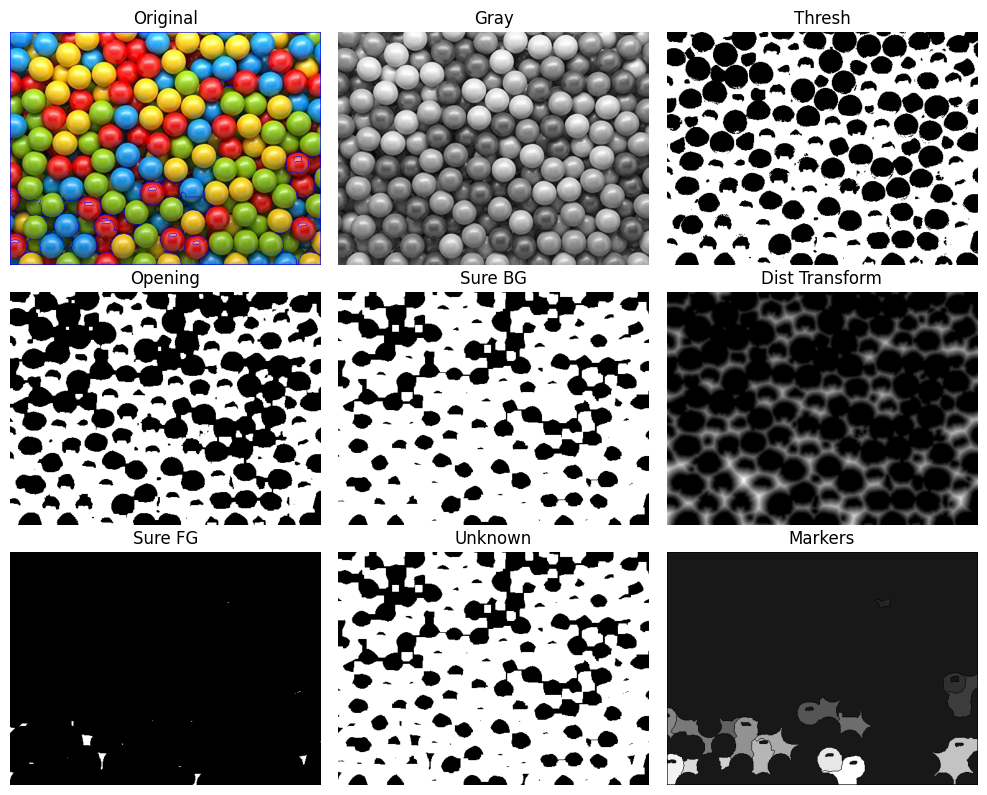

In [33]:
# Display images using a loop and smaller size
images = [img, gray, thresh, opening, sure_bg, dist_transform, sure_fg, unknown, markers]
titles = ['Original', 'Gray', 'Thresh', 'Opening', 'Sure BG', 'Dist Transform', 'Sure FG', 'Unknown', 'Markers']

plt.figure(figsize=(10, 8))  # Adjust figure size as needed
for i in range(len(images)):
    plt.subplot(3, 3, i+1)
    plt.imshow(cv.cvtColor(images[i], cv.COLOR_BGR2RGB) if images[i].ndim == 3 else images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()
